In [19]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [20]:
def load_data(processed_X_test_path: str):
    X_test = pd.read_csv(processed_X_test_path)
    X_test['filepath'] = X_test['filepath'].apply(lambda x: '../' + x)

    return X_test


def load_model(model_filepath: str):
    return tf.keras.saving.load_model(model_filepath)

In [21]:
test_df = load_data('../data/processed/X_test.csv')
model = load_model('../models/cat_classifier.keras')

In [22]:
test_df.drop(columns=test_df.columns[0], inplace=True)
test_df.head()

,filepath,label
0,../data/images/Balinese/25109398_614.jpg,Balinese
1,../data/images/Tonkinese/27252261_408.jpg,Tonkinese
2,../data/images/Balinese/28201868_532.jpg,Balinese
3,../data/images/Balinese/27861515_545.jpg,Balinese
4,../data/images/Abyssinian/42635732_144.jpg,Abyssinian


In [23]:
img_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')

X_test = img_datagen.flow_from_dataframe(dataframe = test_df,  x_col='filepath', y_col='label',  target_size=(299, 299), shuffle=False, batch_size=30, seed = 12)

Found 102 validated image filenames belonging to 3 classes.


In [24]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
predictions

4/4 [==============================] - 3s 390ms/step


array([0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0])

In [25]:
# Figure out how to load from hydra configurations
indices = {
    'Abyssinian': 0,
    'Balinese': 1,
    'Tonkinese': 2
}

test_df["label"].replace(indices, inplace=True)

In [26]:
test_df.head()

,filepath,label
0,../data/images/Balinese/25109398_614.jpg,1
1,../data/images/Tonkinese/27252261_408.jpg,2
2,../data/images/Balinese/28201868_532.jpg,1
3,../data/images/Balinese/27861515_545.jpg,1
4,../data/images/Abyssinian/42635732_144.jpg,0


In [27]:
test_accuracy = model.evaluate(X_test)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

4/4 [==============================] - 5s 497ms/step - loss: 0.5786 - accuracy: 0.7451
Test accuracy is :  74.50980544090271 %


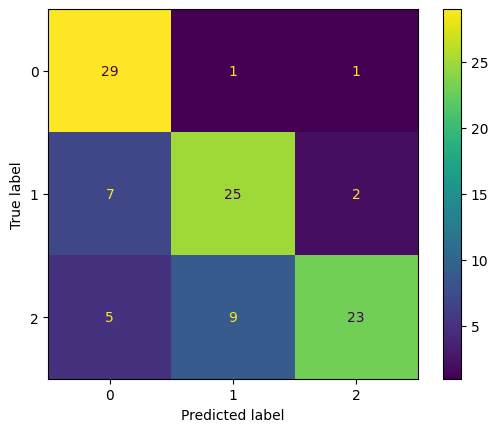

In [28]:
# Not that great as expected, since model was trained only for one epoch anyways
cf = confusion_matrix(test_df["label"] , predictions)
disp = ConfusionMatrixDisplay(cf)
disp.plot()

In [29]:
print(classification_report(test_df["label"], predictions))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        31
           1       0.71      0.74      0.72        34
           2       0.88      0.62      0.73        37

    accuracy                           0.75       102
   macro avg       0.77      0.76      0.75       102
weighted avg       0.77      0.75      0.75       102



In [31]:
print("F1 score: ", f1_score(test_df['label'], predictions, average = 'weighted'))

F1 score:  0.7512331019364267
